In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px


In [7]:
df = pd.read_csv("../../assets/teste_indicium_precificacao.csv")

In [39]:
df_pp = df.copy()
df_pp = df_pp.dropna(subset=['host_name', 'nome'])
df_pp['ultima_review_timestamp'] = df_pp['ultima_review'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp() if pd.notnull(x) else 0)
df_pp['reviews_por_mes'] = df_pp['reviews_por_mes'].fillna(0)
df_pp['ultima_review'] = df_pp['ultima_review'].fillna(0)

df_pp = pd.get_dummies(df_pp, columns=['bairro_group'], prefix=['bairro_group_type'], dtype=int)
df_pp = pd.get_dummies(df_pp, columns=['room_type'], prefix=['room_type_type'], dtype=int)

df_pp = df_pp.select_dtypes(exclude=["object"])
df_pp = df_pp.drop(['id', 'host_id'], axis=1)
df_pp


,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,ultima_review_timestamp,bairro_group_type_Bronx,bairro_group_type_Brooklyn,bairro_group_type_Manhattan,bairro_group_type_Queens,bairro_group_type_Staten Island,room_type_type_Entire home/apt,room_type_type_Private room,room_type_type_Shared room
0,40.75362,-73.98377,225,1,45,0.38,2,355,1.558408e+09,0,0,1,0,0,1,0,0
1,40.80902,-73.94190,150,3,0,0.00,1,365,0.000000e+00,0,0,1,0,0,0,1,0
2,40.68514,-73.95976,89,1,270,4.64,1,194,1.562296e+09,0,1,0,0,0,1,0,0
3,40.79851,-73.94399,80,10,9,0.10,1,0,1.542596e+09,0,0,1,0,0,1,0,0
4,40.74767,-73.97500,200,3,74,0.59,1,129,1.561172e+09,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,40.67853,-73.94995,70,2,0,0.00,2,9,0.000000e+00,0,1,0,0,0,0,1,0
48890,40.70184,-73.93317,40,4,0,0.00,2,36,0.000000e+00,0,1,0,0,0,0,1,0
48891,40.81475,-73.94867,115,10,0,0.00,1,27,0.000000e+00,0,0,1,0,0,1,0,0
48892,40.75751,-73.99112,55,1,0,0.00,6,2,0.000000e+00,0,0,1,0,0,0,0,1


In [52]:
X = df_pp.drop(["price", "ultima_review_timestamp"], axis=1)
# X = df_pp[['latitude', 'longitude', 'disponibilidade_365']]
y = df_pp.price

# X_norm = X.copy()
# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X_norm)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression, LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [54]:
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

0.1070433522517904


,Actual,Predicted
5880,199,284.328217
35926,95,117.043920
16413,150,189.856258
23347,90,111.594837
2531,145,211.498159
...,...,...
9154,350,246.816530
29973,49,3.707075
10901,195,151.403431
4182,75,95.726903


In [62]:
from matplotlib import pyplot as plt

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.reset_index(drop=True, inplace=True)
results
# Plotting the 'Actual' values


,Actual,Predicted
0,199,284.328217
1,95,117.043920
2,150,189.856258
3,90,111.594837
4,145,211.498159
...,...,...
9767,350,246.816530
9768,49,3.707075
9769,195,151.403431
9770,75,95.726903


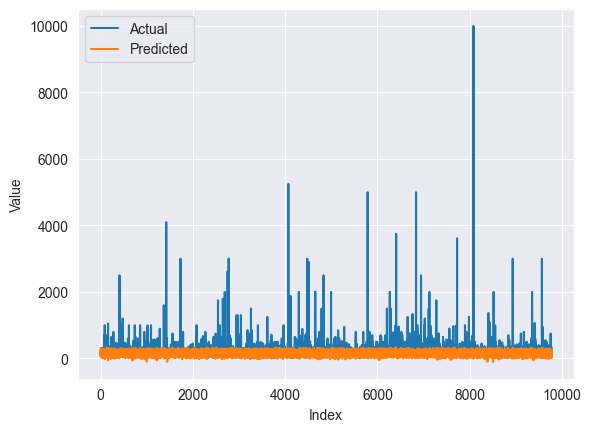

In [63]:
plt.plot(results['Actual'], label='Actual')

# Plotting the 'Predicted' values
plt.plot(results['Predicted'], label='Predicted')

# Adding a legend to distinguish between the two lines
plt.legend()

# Adding labels to the axes
plt.xlabel('Index')
plt.ylabel('Value')

# Displaying the plot
plt.show()

In [71]:
results['Predicted'].max()

334.4206984366974

In [68]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame to a long format suitable for Plotly
results_melted = results.melt(var_name='Type', value_name='Value')

# Plotting the lines using Plotly
fig = px.line(results_melted, x=results_melted.index, y='Value', color='Type', title='Actual vs Predicted')

# Displaying the plot
fig.show()